# Gradient Descent
This is an optimization algorithm

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import IPython.display as display
import ipywidgets as widgets
%matplotlib nbagg

In [2]:
n = 100
X = np.random.randn(n,1) * 10
ones = np.ones((n,1))
X = np.concatenate((X, ones), axis=1)
theta = np.array([[2],[3]])
y = np.dot(X, theta) + np.random.randn(n,1)*3

In [3]:
def cost(y_hat, y):
    n = y.shape[0]
    err = y_hat - y
    cost = np.dot(err.T, err) / n
    return cost

In [4]:
def gradient_descent(X, y, lr=1e-4, epochs=100):
    theta_hat = np.zeros((X.shape[1],1))
    loss = list()
    lst_theta_hat = list(theta_hat)
    for i in range(epochs):
        y_hat = np.dot(X, theta_hat)
        err = y_hat - y
        grad = np.dot(X.T, err).mean(axis=1).reshape(theta_hat.shape)
        theta_hat -= lr * grad
        if (i % 10 == 9) or (i == epochs-1):
            lst_theta_hat.append(theta_hat)
            loss.append((i, cost(y_hat, y).item()))
    return (loss, lst_theta_hat)

In [5]:
loss, lst_theta_hat = gradient_descent(X, y, epochs=800)
print(lst_theta_hat[-1])

[[1.99064345]
 [3.41385631]]


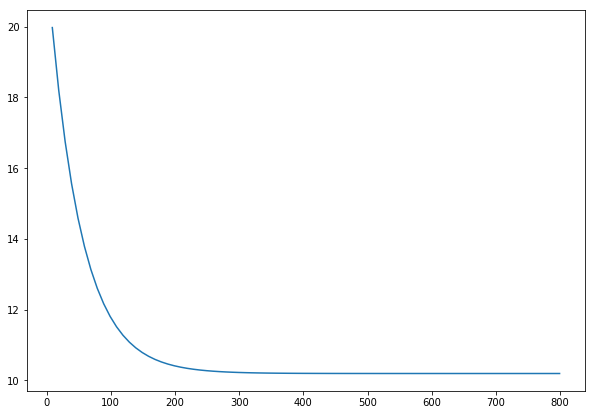

In [9]:
X_0 = np.linspace(-30,30,100).reshape((n,1))
X_0 = np.concatenate((X_0, np.ones((X_0.shape[0],1))), axis=1)
y_0 = np.dot(X_0, lst_theta_hat[-1])
learning_curve = np.array(loss)
plt.figure(figsize=(10,7))
# plt.scatter(X[:,0], y)
# plt.plot(X_0[:,0], y_0, color='red')
plt.plot(learning_curve[:,0], learning_curve[:,1])
plt.show()